# Week 2-3: Discrete random variables


 #### [Back to main page](https://petrosyan.page/fall2020math3215)


___
### Example 1

Consider the  double coin flip experiment $S=\{HH, HT, TH, TT\}$, and define a random variable which counts the number of heads in each outcome. Then 
$$X(HH)=2,\;X(HT)=1,\;X(TH)=1,\; X(TT)=0.$$
 
Observe that Range$(X)=\{0,1,3\}$ and the pmf of the random variable is 
        
$$f(0)=0.25,\; f(1)=0.5,\; f(2)=0.15.$$

Below we draw the line graph and the histogram of the pmf of this random variable. Red circles represent the range of $X$.

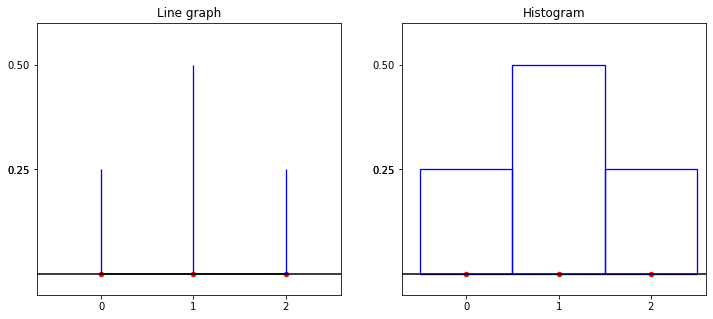

In [137]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12, 5)

range_x = np.array([0, 1, 2])
pmf_values = np.array([1/4, 1/2, 1/4])

fig, [ax1, ax2] = plt.subplots(1,2, num=1, clear=True)

ax1.set_ylim(-0.05,0.6) 
ax1.set_xlim(-0.7, 2.6)
ax1.axhline(y=0, color='k')
ax1.set_xticks(range_x)
ax1.set_yticks(pmf_values)

ax2.set_ylim(-0.05, 0.6) 
ax2.set_xlim(-0.7, 2.6)
ax2.axhline(y=0, color='k')
ax2.set_xticks(range_x)
ax2.set_yticks(pmf_values)


# Plotting line graphs using plt.stem with stems removed
ax1.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
markers,stems,base = ax1.stem(range_x, pmf_values, markerfmt=' ', linefmt="blue", basefmt="black", use_line_collection=True)
stems.set_linewidth(1.3)
ax1.set_title("Line graph")


# PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
ax2.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
ax2.bar(range_x, pmf_values, width=1, color=(1, 1, 1, 0), edgecolor='blue', linewidth=1.3, label="Histogran")
ax2.set_title("Histogram")

plt.show();
                       

___
### Example 2

If Range$(X)=\{x_1,\dots,x_k\}$ and $P(x_1)=\cdots=P(x_k)=\frac{1}{k}$ then we say that $X$ has uniform distribution.

in the example below, the range of $X$ is 

$$ \text{Range}(X)=\{-3, -6, 5, 9, 2, 1, 3, 8, 7, 10\}$$

with $f(x)=0.1$ for every $x\in \text{Range}(X).$

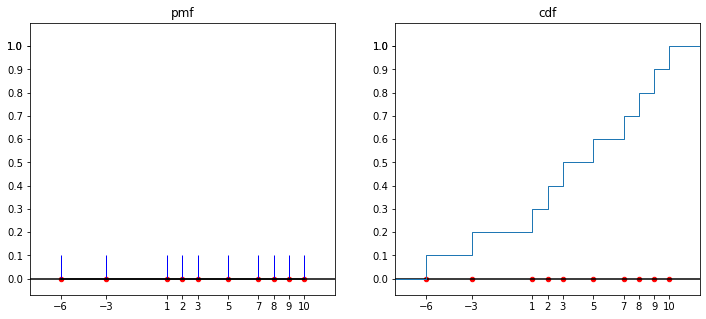

In [141]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12, 5)

K=10
range_x=np.array([-3, -6, 5, 9, 2, 1, 3, 8, 7, 10])
pmf_values=np.ones(range_x.size)/range_x.size

# Sort x and y according to order in x
sortargs = range_x.argsort()
range_x = range_x[sortargs]
pmf_values = pmf_values[sortargs]

#cdf values using cumsum function with padding
cdf_values = np.cumsum(pmf_values)

def padding(cdf_values, range_x):
    edge = (range_x[0]-2, range_x[-1]+2)
    range_x_padded = np.pad(range_x, (1,1), 'constant', constant_values=edge)
    cdf_values_padded = np.pad(cdf_values, (1,1), 'constant', constant_values=(0, 1))
    return cdf_values_padded, range_x_padded, edge

cdf_values_padded, range_x_padded, edge = padding(cdf_values, range_x)
# setting up the figure
fig, [ax1, ax2] = plt.subplots(1,2, num=1, clear=True)

ax1.set_ylim(-0.07,1.1)
ax1.axhline(y=0, color='k')
ax1.set_xlim(edge)
ax1.set_xticks(range_x)
ax1.set_yticks(cdf_values_padded)

ax2.set_ylim(-0.07,1.1) 
ax2.axhline(y=0, color='k')
ax2.set_xlim(edge)
ax2.set_xticks(range_x)
ax2.set_yticks(cdf_values_padded)


# plot line grapghs
ax1.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
markers,stems,base = ax1.stem(range_x, pmf_values, markerfmt=' ', linefmt="blue", basefmt="black", use_line_collection=True)
stems.set_linewidth(1)
ax1.set_title("pmf")

# plot cdf using step function
ax2.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
ax2.step(range_x_padded, cdf_values_padded, linewidth=1, where='post')
ax2.set_title("cdf")

plt.show();

___
### Relative frequency histogram for pmf

Suppose our data   consists of values of the random variable on a sequence of trial outcomes. As mentioned earlier, probability of an event represents how frequent the experiment outcome terminates in the event, in a large number of repetitive trials. Hence,  the pmf at $x\in\text{Range}(X)$ can be empirically estimated using the relative frequency 

 $$f_{\text{emp}}(x)= \frac{\text{number of elements in data = }x}{ \text{ size of data}}.$$
 
Resulting relative frequency histogram will approximate the pmf histogram.

In the example below, we consider the following experiment: a dice is tossed twice and the random variable is the maximum of the two tosses: 

$$S=\{(i,j):\; 1\leq i\leq n, 1\leq j\leq 6\}$$

and for any $s=(i,j)$,
      
 $$X(i,j)=\max\{i,j\}.$$
 
 It can be seen that in this case, $\text{range}(X)=\{1,\dots, n\}$ and, for any $x\in \text{range}(X)$,
 
 $$f(x)=\frac{2x-1}{n^2}.$$

The data consist of values of $X$ on 1000 random pairs of tosses.

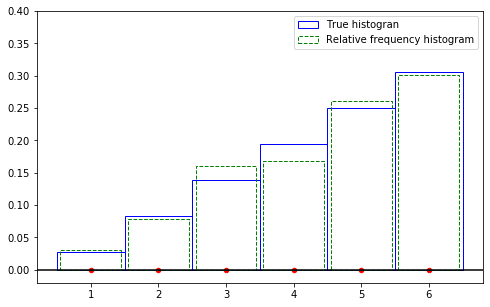

In [287]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (8, 5)

n = 6
num_samples=1000

range_x = np.arange(1,n+1)
pmf_values = np.array([(2*i-1)/n**2 for i in range(1,n+1)])

# generate data
toss = np.random.randint(1,n+1,(2,num_samples))
data = np.amax(toss, axis=0).squeeze()

# compute empirical pmf
def epmf(data):
    erange_x, counts = np.unique(data, return_counts=True)
    epmf_values = counts/data.size
    return epmf_values, erange_x

epmf_values, erange_x = epmf(data)

# plot 
plt.ylim(-0.02,0.4) 
plt.axhline(y=0, color='k')
plt.xticks(range_x)

plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
plt.bar(range_x, pmf_values, width=1, color=(1, 1, 1, 0), edgecolor='blue', linewidth=1, label="True histogran")
plt.bar(erange_x, epmf_values, width=0.9, color=(1, 1, 1, 0), edgecolor='green', linewidth=1,linestyle="--", label="Relative frequency histogram")
plt.legend()
plt.show();

___
### Empirical cdf

Similar to empirical pmf, the empirical cfd is computed as

$$F_{\text{emp}}(x)=\frac{\text{number of outomes }\leq x}{\text{size of data}}.$$

We consider the double die toss experiment. Let the random variable $X$ be the maximum of two tosses. Again,   $\text{Range}(X)=\{1,\dots, 6\}$ and it can be checked that
     $$F(x)=
\begin{cases}
0 & x<1\\
\sum\limits_{i=1}^k\frac{2i-1}{6^2}=\frac{k^2}{6^2} & k\leq x<k+1, \text{ for }k=1,\dots,5\\
1 & 6<x.
\end{cases}$$
In the numerical example below we collect 1000 pairs of tosses of the die and collect the maximum value of each pair as our data. The graph shows the real and the empirical cdf-s.

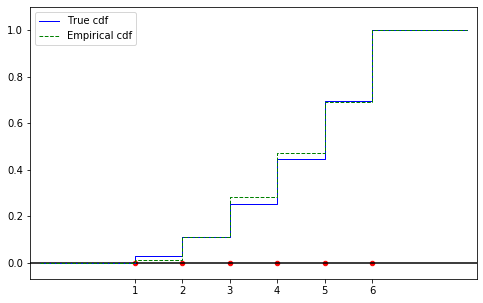

In [349]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (8, 5)

n = 6
num_samples=100
range_x = np.arange(1,n+1)

# generate data
toss = np.random.randint(1,n+1,(2,num_samples))
data = np.amax(toss, axis=0).squeeze()

# compute true cdf values
cdf_values = np.array([i**2/n**2 for i in range(1,n+1)])

# compute eepirical cdf values
def ecdf(data):
    erange_x, counts = np.unique(data, return_counts=True)
    cdf_emp = np.cumsum(counts)/data.size
    return cdf_emp, erange_x

ecdf_values, erange_x = ecdf(data)

# add padding 
def padding(cdf_values, range_x):
    edge = (range_x[0]-2, range_x[-1]+2)
    range_x_padded = np.pad(range_x, (1,1), 'constant', constant_values=edge)
    cdf_values_padded = np.pad(cdf_values, (1,1), 'constant', constant_values=(0, 1))
    return cdf_values_padded, range_x_padded

cdf_values_padded, range_x_padded = padding(cdf_values, range_x)
ecdf_values_padded, erange_x_padded = padding(ecdf_values, erange_x)

# plot setup
plt.ylim(-0.07,1.1)
plt.xlim(-1.2,8.2)
plt.axhline(y=0, color='k')
plt.xticks(range_x)

# plot cdf using step function
plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
plt.step(range_x_padded, cdf_values_padded, where='post', color="blue", linewidth=1, label="True cdf")
plt.step(erange_x_padded, ecdf_values_padded, where='post', color="green", linewidth=1, linestyle="--", label='Empirical cdf')
plt.legend()

plt.show();


___
### Hypergeometric distribution

Suppose  $N$ balls in an urn, $K$ of which are red, the rest are blue. $n$ balls are selected without order and without replacement.    
 Let $S$ be the set of all such selections.  Consider the following random variable:for $s\in S$, define $X(s)$ to be the number of red balls in $s$.     
 
The  histogram of this random variable is shown below. Red circles represent the range of $X$. You can change the values of the paramaters by playing with the slider. 

In [148]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
from ipywidgets import interact

plt.rcParams["figure.figsize"] = (20, 5)

def hypergeometric_pmf(N=80,K=40,n=30):
    range_x = np.arange(max(0, n-(N-K)), min(n, K)+1, 1)

    def hyper_pmf(N,K,n,i):
        pmf_val = comb(K, i, exact=True) * comb(N-K, n-i, exact=True) / comb(N, n, exact=True)
        return pmf_val

    pmf_values = np.array([hyper_pmf(N,K,n,i) for i in range_x])

    # plot setup
    plt.axhline(y=0, color='k')
    plt.xlim(-2,N+2)
    plt.xticks(np.arange(0, N+1, 2))

    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
    plt.bar(range_x, pmf_values, width=1, color=(1, 1, 1, 0), edgecolor='blue', linewidth=1.3, label="Histogran")
    plt.title("N={}, K={}, n={}".format(N,K,n))
    plt.plot();

interact(hypergeometric_pmf, N=(0,100,1), K=(0,100,1), n=(0,100,1));

interactive(children=(IntSlider(value=80, description='N'), IntSlider(value=40, description='K'), IntSlider(va…